In [1]:
from experiment import *
from cugal.config import SinkhornMethod, HungarianMethod
import os
import torch

λ:   0%|          | 0/15 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

λ:   0%|          | 0/15 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.11/site-packages/fugal/sinkhorn.py:176: UserWarning: An output with one or more elements was resized since it had shape [100], which does not match the required output shape [1, 100]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /opt/conda/conda-bld/pytorch_1711403378171/work/aten/src/ATen/native/Resize.cpp:28.)
  torch.matmul(u, K, out=KTu)


frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

frank-wolfe:   0%|          | 0/10 [00:00<?, ?it/s]

3892736394
[Result(ics=0.053156146179401995, ec=0.053156146179401995, sss=0.027303754266211604, accuracy=0.02, profile=Profile(sinkhorn_profiles=[SinkhornProfile(errors=[], iteration_count=11, time=0.0012247040271759033), SinkhornProfile(errors=[], iteration_count=11, time=0.0009062399864196777), SinkhornProfile(errors=[], iteration_count=11, time=0.0008529279828071594), SinkhornProfile(errors=[], iteration_count=11, time=0.0008477759957313538), SinkhornProfile(errors=[], iteration_count=11, time=0.0008407040238380433), SinkhornProfile(errors=[], iteration_count=11, time=0.000847872018814087), SinkhornProfile(errors=[], iteration_count=11, time=0.0008929280042648315), SinkhornProfile(errors=[], iteration_count=11, time=0.0008353599905967712), SinkhornProfile(errors=[], iteration_count=11, time=0.0008253440260887146), SinkhornProfile(errors=[], iteration_count=11, time=0.0008447999954223633), SinkhornProfile(errors=[], iteration_count=11, time=0.001082368016242981), SinkhornProfile(erro

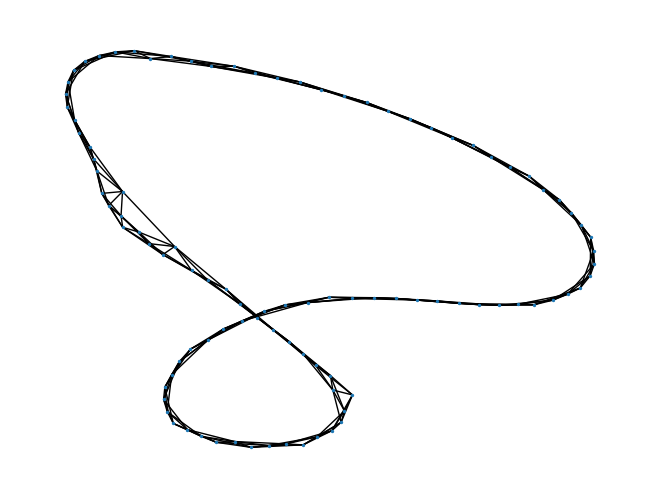

In [17]:
config = Config(
    device='cuda:1', 
    sinkhorn_method=SinkhornMethod.LOG,
    dtype=torch.float32,
    sinkhorn_threshold=1e-3,
    sinkhorn_iterations=500,
    mu=2,
    iter_count=15,
    use_sparse_adjacency=True,
    sinkhorn_cache_size=1,
    frank_wolfe_threshold=0,
    recompute_distance=True,
    hungarian_method=HungarianMethod.DOUBLE_GREEDY,
    )
experiment = Experiment(
    graphs=[
        Graph(GraphKind.NEWMAN_WATTS, {
            'n': 100,
            'p': 0.001,
            'k': 7,
        }),
    ],
    algorithms=[
        Algorithm(config, use_fugal=False),
        Algorithm(config, use_fugal=True),
    ],
    noise_levels=[
        NoiseLevel(0., 0.0, False),
    ],
)
results = experiment.run()

print(experiment.seed)
#[print(res) for res in results.results[:][0]]
print(results.results)

folder = "results"
if not os.path.exists(folder): os.makedirs(folder)
#results.dump(folder)